# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [10]:
import pandas as pd
import numpy as np

In [2]:
df1=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
df1.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

In [4]:
df1.shape

(2356, 17)

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
import requests

In [6]:
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response=requests.get(url)
image=open('image_predictions.tsv','wb')
image.write(response.content)

335079

In [7]:
image=pd.read_csv('image_predictions.tsv',sep='\t')

In [8]:
image.head(1)

tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   

   img_num                      p1   p1_conf  p1_dog      p2   p2_conf  \
0        1  Welsh_springer_spaniel  0.465074    True  collie  0.156665   

   p2_dog                 p3   p3_conf  p3_dog  
0    True  Shetland_sheepdog  0.061428    True

In [9]:
image.shape

(2075, 12)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt) (to get retweet count and favorite count)

In [68]:
# copy the code
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

In [12]:
import json
df2=pd.DataFrame(columns=['tweet_id','retweet_count','favorite_count'])
with open('tweet-json.txt') as file:
    for line in file:
        print(line)
        status=json.loads(line)
        tweet_id=status['id_str']
        rt_count=status['retweet_count']
        fav_count=status['favorite_count']
        df2=df2.append(pd.DataFrame([[tweet_id,rt_count,fav_count]],columns=['tweet_id','retweet_count','favorite_count']))

{"created_at": "Tue Aug 01 16:23:56 +0000 2017", "id": 892420643555336193, "id_str": "892420643555336193", "full_text": "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU", "truncated": false, "display_text_range": [0, 85], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 892420639486877696, "id_str": "892420639486877696", "indices": [86, 109], "media_url": "http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "media_url_https": "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg", "url": "https://t.co/MgUWQ76dJU", "display_url": "pic.twitter.com/MgUWQ76dJU", "expanded_url": "https://twitter.com/dog_rates/status/892420643555336193/photo/1", "type": "photo", "sizes": {"large": {"w": 540, "h": 528, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 540, "h": 528, "resize": "fit"}, "medium": {"w": 540, "h": 528, "resize": "fit"}}}]}, "extended_entities": {"media


{"created_at": "Wed Jun 14 16:04:48 +0000 2017", "id": 875021211251597312, "id_str": "875021211251597312", "full_text": "Guys please stop sending pictures without any dogs in th- oh never mind hello excuse me sir. 12/10 stealthy as h*ck https://t.co/brCQoqc8AW", "truncated": false, "display_text_range": [0, 115], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 875021140921417728, "id_str": "875021140921417728", "indices": [116, 139], "media_url": "http://pbs.twimg.com/media/DCSzF3OUAAAs6lS.jpg", "media_url_https": "https://pbs.twimg.com/media/DCSzF3OUAAAs6lS.jpg", "url": "https://t.co/brCQoqc8AW", "display_url": "pic.twitter.com/brCQoqc8AW", "expanded_url": "https://twitter.com/dog_rates/status/875021211251597312/photo/1", "type": "photo", "sizes": {"small": {"w": 680, "h": 666, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 1600, "h": 1568, "resize": "fit"}, "medium": {"w": 1200, "h": 1176, "resize": "fi


{"created_at": "Tue May 09 02:29:07 +0000 2017", "id": 861769973181624320, "id_str": "861769973181624320", "full_text": "RT @dog_rates: \"Good afternoon class today we're going to learn what makes a good boy so good\" 13/10 https://t.co/f1h2Fsalv9", "truncated": false, "display_text_range": [0, 124], "entities": {"hashtags": [], "symbols": [], "user_mentions": [{"screen_name": "dog_rates", "name": "WeRateDogs\u2122 (author)", "id": 4196983835, "id_str": "4196983835", "indices": [3, 13]}], "urls": [], "media": [{"id": 806629061598597121, "id_str": "806629061598597121", "indices": [101, 124], "media_url": "http://pbs.twimg.com/media/CzG425oXUAEu0Cc.jpg", "media_url_https": "https://pbs.twimg.com/media/CzG425oXUAEu0Cc.jpg", "url": "https://t.co/f1h2Fsalv9", "display_url": "pic.twitter.com/f1h2Fsalv9", "expanded_url": "https://twitter.com/dog_rates/status/806629075125202948/photo/1", "type": "photo", "sizes": {"medium": {"w": 900, "h": 1200, "resize": "fit"}, "thumb": {"w": 150, "h": 150,


{"created_at": "Fri Mar 31 01:11:22 +0000 2017", "id": 847617282490613760, "id_str": "847617282490613760", "full_text": ".@breaannanicolee PUPDATE: Cannon has a heart on his nose. Pupgraded to a 13/10", "truncated": false, "display_text_range": [18, 79], "entities": {"hashtags": [], "symbols": [], "user_mentions": [{"screen_name": "breaannanicolee", "name": "Breanna Burd", "id": 1046500110, "id_str": "1046500110", "indices": [1, 17]}], "urls": []}, "source": "<a href=\"http://twitter.com/download/iphone\" rel=\"nofollow\">Twitter for iPhone</a>", "in_reply_to_status_id": 847606175596138505, "in_reply_to_status_id_str": "847606175596138505", "in_reply_to_user_id": 4196983835, "in_reply_to_user_id_str": "4196983835", "in_reply_to_screen_name": "dog_rates", "user": {"id": 4196983835, "id_str": "4196983835", "name": "WeRateDogs\u2122 (author)", "screen_name": "dog_rates", "location": "DM YOUR DOGS, WE WILL RATE", "description": "#1 Source for Professional Dog Ratings | STORE: @ShopWeRateD


{"created_at": "Fri Feb 24 17:01:22 +0000 2017", "id": 835172783151792128, "id_str": "835172783151792128", "full_text": "We only rate dogs. Please don't send in any non-canines like this Floppy Tongued House Panda. Thank you... 12/10 would still pet https://t.co/8fX2VkExnL", "truncated": false, "display_text_range": [0, 128], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 835172763019194370, "id_str": "835172763019194370", "indices": [129, 152], "media_url": "http://pbs.twimg.com/media/C5chM_nXMAIiK0u.jpg", "media_url_https": "https://pbs.twimg.com/media/C5chM_nXMAIiK0u.jpg", "url": "https://t.co/8fX2VkExnL", "display_url": "pic.twitter.com/8fX2VkExnL", "expanded_url": "https://twitter.com/dog_rates/status/835172783151792128/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 1536, "h": 2048, "resize": "fit"}, "small": {"w": 510, "h": 680, "resize": "fit"}, "medium": {"w": 900, "h": 1200, "

{"created_at": "Wed Feb 01 01:09:42 +0000 2017", "id": 826598365270007810, "id_str": "826598365270007810", "full_text": "This is Pawnd... James Pawnd. He's suave af. 13/10 would trust with my life https://t.co/YprN62Z74I", "truncated": false, "display_text_range": [0, 75], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 826598343044452352, "id_str": "826598343044452352", "indices": [76, 99], "media_url": "http://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg", "media_url_https": "https://pbs.twimg.com/media/C3iq0EEXUAAdBYC.jpg", "url": "https://t.co/YprN62Z74I", "display_url": "pic.twitter.com/YprN62Z74I", "expanded_url": "https://twitter.com/dog_rates/status/826598365270007810/photo/1", "type": "photo", "sizes": {"medium": {"w": 900, "h": 1200, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 1536, "h": 2048, "resize": "fit"}, "small": {"w": 510, "h": 680, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



{"created_at": "Sun Mar 06 05:11:12 +0000 2016", "id": 706346369204748288, "id_str": "706346369204748288", "full_text": "This is Koda. She's a Beneboom Cumberwiggle. 12/10 petable as hell https://t.co/VZV6oMJmU6", "truncated": false, "display_text_range": [0, 90], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 706346354252095488, "id_str": "706346354252095488", "indices": [67, 90], "media_url": "http://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg", "media_url_https": "https://pbs.twimg.com/media/Cc1yRE2WoAAgxFQ.jpg", "url": "https://t.co/VZV6oMJmU6", "display_url": "pic.twitter.com/VZV6oMJmU6", "expanded_url": "https://twitter.com/dog_rates/status/706346369204748288/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 720, "h": 960, "resize": "fit"}, "medium": {"w": 600, "h": 800, "resize": "fit"}, "small": {"w": 340, "h": 453, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 706346354


{"created_at": "Fri Feb 12 17:22:12 +0000 2016", "id": 698195409219559425, "id_str": "698195409219559425", "full_text": "Meet Beau &amp; Wilbur. Wilbur stole Beau's bed from him. Wilbur now has so much room for activities. 9/10 for both pups https://t.co/GPaoH5qWEk", "truncated": false, "display_text_range": [0, 144], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 698195403653705729, "id_str": "698195403653705729", "indices": [121, 144], "media_url": "http://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg", "media_url_https": "https://pbs.twimg.com/media/CbB9BTqW8AEVc2A.jpg", "url": "https://t.co/GPaoH5qWEk", "display_url": "pic.twitter.com/GPaoH5qWEk", "expanded_url": "https://twitter.com/dog_rates/status/698195409219559425/photo/1", "type": "photo", "sizes": {"medium": {"w": 600, "h": 538, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "large": {"w": 621, "h": 557, "resize": "fit"}, "small": {"w": 340, "h": 305, "resize": "f


{"created_at": "Thu Jan 28 02:12:04 +0000 2016", "id": 692530551048294401, "id_str": "692530551048294401", "full_text": "Say hello to Cody. He's been to like 80 countries and is way more cultured than you. He wanted me to say that. 10/10 https://t.co/Iv3flDTpXu", "truncated": false, "display_text_range": [0, 140], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 692530544530296832, "id_str": "692530544530296832", "indices": [117, 140], "media_url": "http://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg", "media_url_https": "https://pbs.twimg.com/media/CZxc3G7WEAAM4Mv.jpg", "url": "https://t.co/Iv3flDTpXu", "display_url": "pic.twitter.com/Iv3flDTpXu", "expanded_url": "https://twitter.com/dog_rates/status/692530551048294401/photo/1", "type": "photo", "sizes": {"large": {"w": 574, "h": 734, "resize": "fit"}, "small": {"w": 340, "h": 435, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 574, "h": 734, "resize": "fit"}


{"created_at": "Thu Jan 14 03:45:57 +0000 2016", "id": 687480748861947905, "id_str": "687480748861947905", "full_text": "Another magnificent photo. 12/10 https://t.co/X5w387K5jr", "truncated": false, "display_text_range": [0, 56], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 687480736518111232, "id_str": "687480736518111232", "indices": [33, 56], "media_url": "http://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg", "media_url_https": "https://pbs.twimg.com/media/CYpsFmIWAAAYh9C.jpg", "url": "https://t.co/X5w387K5jr", "display_url": "pic.twitter.com/X5w387K5jr", "expanded_url": "https://twitter.com/dog_rates/status/687480748861947905/photo/1", "type": "photo", "sizes": {"large": {"w": 1024, "h": 1024, "resize": "fit"}, "medium": {"w": 600, "h": 600, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 340, "h": 340, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 687480736518111232, "id_str": "687480736


{"created_at": "Sun Jan 03 02:53:17 +0000 2016", "id": 683481228088049664, "id_str": "683481228088049664", "full_text": "Meet Banjo. He's a Peppercorn Shoop Da Whoop. Nails look lethal. Skeptical of luminescent orb 11/10 stay woke pupper https://t.co/H7NZFumpKq", "truncated": false, "display_text_range": [0, 140], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 683481223382052864, "id_str": "683481223382052864", "indices": [117, 140], "media_url": "http://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg", "media_url_https": "https://pbs.twimg.com/media/CXw2jSpWMAAad6V.jpg", "url": "https://t.co/H7NZFumpKq", "display_url": "pic.twitter.com/H7NZFumpKq", "expanded_url": "https://twitter.com/dog_rates/status/683481228088049664/photo/1", "type": "photo", "sizes": {"medium": {"w": 540, "h": 960, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 340, "h": 604, "resize": "fit"}, "large": {"w": 540, "h": 960, "resize": "fit"}


{"created_at": "Thu Dec 24 03:12:15 +0000 2015", "id": 679862121895714818, "id_str": "679862121895714818", "full_text": "\"Dammit hooman I'm jus trynna lik the fler\" 11/10 https://t.co/eRZRI8OTj7", "truncated": false, "display_text_range": [0, 73], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 679862116216651776, "id_str": "679862116216651776", "indices": [50, 73], "media_url": "http://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg", "media_url_https": "https://pbs.twimg.com/media/CW9a_h1WwAApmAy.jpg", "url": "https://t.co/eRZRI8OTj7", "display_url": "pic.twitter.com/eRZRI8OTj7", "expanded_url": "https://twitter.com/dog_rates/status/679862121895714818/photo/1", "type": "photo", "sizes": {"thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 600, "h": 800, "resize": "fit"}, "large": {"w": 768, "h": 1024, "resize": "fit"}, "small": {"w": 340, "h": 453, "resize": "fit"}}}]}, "extended_entities": {"media": [{"id": 679862116216651776, "i


{"created_at": "Tue Dec 15 22:52:02 +0000 2015", "id": 676897532954456065, "id_str": "676897532954456065", "full_text": "Exotic handheld dog here. Appears unathletic. Feet look deadly. Can be thrown a great distance. 5/10 might pet idk https://t.co/Avq4awulqk", "truncated": false, "display_text_range": [0, 138], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 676897528592392192, "id_str": "676897528592392192", "indices": [115, 138], "media_url": "http://pbs.twimg.com/media/CWTSt0UW4AALMNB.jpg", "media_url_https": "https://pbs.twimg.com/media/CWTSt0UW4AALMNB.jpg", "url": "https://t.co/Avq4awulqk", "display_url": "pic.twitter.com/Avq4awulqk", "expanded_url": "https://twitter.com/dog_rates/status/676897532954456065/photo/1", "type": "photo", "sizes": {"medium": {"w": 600, "h": 533, "resize": "fit"}, "large": {"w": 640, "h": 568, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "small": {"w": 340, "h": 302, "resize": "fit"}}}


{"created_at": "Thu Dec 10 01:49:36 +0000 2015", "id": 674767892831932416, "id_str": "674767892831932416", "full_text": "This pup was carefully tossed to make it look like she's riding that horse. I have no words this is fabulous. 12/10 https://t.co/Bob33W4sfD", "truncated": false, "display_text_range": [0, 139], "entities": {"hashtags": [], "symbols": [], "user_mentions": [], "urls": [], "media": [{"id": 674767886842511361, "id_str": "674767886842511361", "indices": [116, 139], "media_url": "http://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg", "media_url_https": "https://pbs.twimg.com/media/CV1B0WkWwAEBKVx.jpg", "url": "https://t.co/Bob33W4sfD", "display_url": "pic.twitter.com/Bob33W4sfD", "expanded_url": "https://twitter.com/dog_rates/status/674767892831932416/photo/1", "type": "photo", "sizes": {"large": {"w": 1024, "h": 768, "resize": "fit"}, "thumb": {"w": 150, "h": 150, "resize": "crop"}, "medium": {"w": 600, "h": 450, "resize": "fit"}, "small": {"w": 340, "h": 255, "resize": "fit"}

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
df2.head(1)

tweet_id retweet_count favorite_count
0  892420643555336193          8853          39467

In [14]:
df2.shape

(2354, 3)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [15]:
df1.head(1)

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0  892420643555336193                    NaN                  NaN   

                   timestamp  \
0  2017-08-01 16:23:56 +0000   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...                13   

   rating_denominator     name doggo floofer pupper puppo  
0                  10  Phineas  None    None   None  None

In [16]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [17]:
df1['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [18]:
df1['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [19]:
df1['rating_numerator'].isnull().sum()

0

In [20]:
df1['rating_denominator'].isnull().sum()

0

In [21]:
df1['retweeted_status_id'].count()

181

In [22]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [23]:
image['img_num'].isnull().sum()

0

In [24]:
image['img_num'].unique()

array([1, 4, 2, 3], dtype=int64)

In [25]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   object
 2   favorite_count  2354 non-null   object
dtypes: object(3)
memory usage: 73.6+ KB


### Quality issues
1. incorrect data type of tweet_id and timestamp columns (df1 table)
2. incorrect data type of rating_numerator and rating_denominator columns (df1 table)
2. incorrect data type of tweet_id column (image table)
3. Incorrect data type in retweet_count and favorite_count columns (df2 table)
4. tweet_id 786709082849828864 rating is wrong, is 9.75/10 not 75/10 (df1 table)         
5. tweet_id 778027034220126208 rating is wrong, is 11.27/10 not 27/10 (df1 table)
6. tweet_id 680494726643068929 rating is wrong, is 11.26/10 not 26/10 (df1 table)
7. tweet_id 666287406224695296 rating is wrong, is 9/10 not 1/2 (df1 table)
8. tweet_id 716439118184652801 rating is wrong, is 11/10 not 50/50 (df1 table)
9. tweet_id 722974582966214656 rating is wrong, is 13/10 not 4/20 (df1 table)
10. tweet_id 740373189193256964 rating is wrong, is 14/10 not 9/11 (df1 table)

### Tidiness issues 
1. redundancy columns of in_reply_to_status_id and in_reply_to_user_id columns (df1 table)

2. Redundant rows for retweet data (df1 table)

3. Add rate column to calculate rating_numeritor/rating_denominator (df1 table)


## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [26]:
# Make copies of original pieces of data
df1_clean=df1.copy()
image_clean=image.copy()
df2_clean=df2.copy()

### Issue #1: Incorrect data type of tweet_id and timestamp columns (df1 table)

#### Define: Change data type by using to_datetime() and apply() function

#### Code

In [27]:
df1_clean['timestamp']=pd.to_datetime(df1_clean['timestamp'])

In [28]:
df1_clean['tweet_id']=df1_clean['tweet_id'].apply(str)

#### Test

In [29]:
df1_clean['timestamp'].dtypes

datetime64[ns, UTC]

In [30]:
df1_clean['tweet_id'].dtypes

dtype('O')

### Issue #2: incorrect data type of rating_numerator and rating_denominator columns (df1 table)

#### Define: Change data type from int to float by using astype() function

#### Code

In [31]:
df1_clean[['rating_numerator','rating_denominator']]=df1_clean[['rating_numerator','rating_denominator']].astype(float)

#### Test

In [32]:
df1_clean[['rating_numerator','rating_denominator']].dtypes

rating_numerator      float64
rating_denominator    float64
dtype: object

### Issue #3: Incorrect data type of tweet_id column (image table)

#### Define: Change data type from int to str by using apply() function

#### Code

In [33]:
image_clean['tweet_id']=image_clean['tweet_id'].apply(str)

#### Test

In [34]:
image_clean['tweet_id'].dtypes

dtype('O')

### Issue #4 : Incorrect data type in retweet_count and favorite_count columns (df2 table)

#### Define: Change data type from object to int by using astype() function

#### Code

In [35]:
df2_clean[['retweet_count','favorite_count']]=df2_clean[['retweet_count','favorite_count']].astype(int)

#### Test

In [36]:
df2_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 0
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int32 
 2   favorite_count  2354 non-null   int32 
dtypes: int32(2), object(1)
memory usage: 55.2+ KB


### Issue #5: Incorrect rating information in df1 table

#### Define: Replace incorrect information by using replace() function

#### Code

In [37]:
df1_clean.at[df1_clean.query('tweet_id=="786709082849828864"').index,'rating_numerator']='9.75'

In [38]:
df1_clean.at[df1_clean.query('tweet_id=="778027034220126208"').index,'rating_numerator']='11.27'

In [39]:
df1_clean.at[df1_clean.query('tweet_id=="680494726643068929"').index,'rating_numerator']='11.26'

In [40]:
df1_clean.at[df1_clean.query('tweet_id=="666287406224695296"').index,'rating_numerator']='9'
df1_clean.at[df1_clean.query('tweet_id=="666287406224695296"').index,'rating_denominator']='10'

In [41]:
df1_clean.at[df1_clean.query('tweet_id=="716439118184652801"').index,'rating_numerator']='11'
df1_clean.at[df1_clean.query('tweet_id=="716439118184652801"').index,'rating_denominator']='10'

In [42]:
df1_clean.at[df1_clean.query('tweet_id=="722974582966214656"').index,'rating_numerator']='13'
df1_clean.at[df1_clean.query('tweet_id=="722974582966214656"').index,'rating_denominator']='10'

In [43]:
df1_clean.at[df1_clean.query('tweet_id=="740373189193256964"').index,'rating_numerator']='14'
df1_clean.at[df1_clean.query('tweet_id=="740373189193256964"').index,'rating_denominator']='10'

#### Test

In [44]:
df1_clean.query('tweet_id=="786709082849828864"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
695  786709082849828864                    NaN                  NaN   

                    timestamp  \
695 2016-10-13 23:23:56+00:00   

                                                source  \
695  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
695  This is Logan, the Chow who lived. He solemnly...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
695                       NaN                        NaN   

                                         expanded_urls rating_numerator  \
695  https://twitter.com/dog_rates/status/786709082...             9.75   

    rating_denominator   name doggo floofer pupper puppo  
695                 10  Logan  None    None   None  None

In [45]:
df1_clean.query('tweet_id=="778027034220126208"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
763  778027034220126208                    NaN                  NaN   

                    timestamp  \
763 2016-09-20 00:24:34+00:00   

                                                source  \
763  <a href="http://twitter.com/download/iphone" r...   

                                                  text  retweeted_status_id  \
763  This is Sophie. She's a Jubilant Bush Pupper. ...                  NaN   

     retweeted_status_user_id retweeted_status_timestamp  \
763                       NaN                        NaN   

                                         expanded_urls rating_numerator  \
763  https://twitter.com/dog_rates/status/778027034...            11.27   

    rating_denominator    name doggo floofer  pupper puppo  
763                 10  Sophie  None    None  pupper  None

In [46]:
df1_clean.query('tweet_id=="680494726643068929"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1712  680494726643068929                    NaN                  NaN   

                     timestamp  \
1712 2015-12-25 21:06:00+00:00   

                                                 source  \
1712  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1712  Here we have uncovered an entire battalion of ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1712                       NaN                        NaN   

                                          expanded_urls rating_numerator  \
1712  https://twitter.com/dog_rates/status/680494726...            11.26   

     rating_denominator  name doggo floofer pupper puppo  
1712                 10  None  None    None   None  None

In [47]:
df1_clean.query('tweet_id=="666287406224695296"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
2335  666287406224695296                    NaN                  NaN   

                     timestamp  \
2335 2015-11-16 16:11:11+00:00   

                                                 source  \
2335  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
2335  This is an Albanian 3 1/2 legged  Episcopalian...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
2335                       NaN                        NaN   

                                          expanded_urls rating_numerator  \
2335  https://twitter.com/dog_rates/status/666287406...                9   

     rating_denominator name doggo floofer pupper puppo  
2335                 10   an  None    None   None  None

In [48]:
df1_clean.query('tweet_id=="716439118184652801"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1202  716439118184652801                    NaN                  NaN   

                     timestamp  \
1202 2016-04-03 01:36:11+00:00   

                                                 source  \
1202  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1202  This is Bluebert. He just saw that both #Final...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1202                       NaN                        NaN   

                                          expanded_urls rating_numerator  \
1202  https://twitter.com/dog_rates/status/716439118...               11   

     rating_denominator      name doggo floofer pupper puppo  
1202                 10  Bluebert  None    None   None  None

In [49]:
df1_clean.query('tweet_id=="722974582966214656"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1165  722974582966214656                    NaN                  NaN   

                     timestamp  \
1165 2016-04-21 02:25:47+00:00   

                                                 source  \
1165  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1165  Happy 4/20 from the squad! 13/10 for all https...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1165                       NaN                        NaN   

                                          expanded_urls rating_numerator  \
1165  https://twitter.com/dog_rates/status/722974582...               13   

     rating_denominator  name doggo floofer pupper puppo  
1165                 10  None  None    None   None  None

In [50]:
df1_clean.query('tweet_id=="740373189193256964"')

tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
1068  740373189193256964                    NaN                  NaN   

                     timestamp  \
1068 2016-06-08 02:41:38+00:00   

                                                 source  \
1068  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1068  After so many requests, this is Bretagne. She ...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1068                       NaN                        NaN   

                                          expanded_urls rating_numerator  \
1068  https://twitter.com/dog_rates/status/740373189...               14   

     rating_denominator  name doggo floofer pupper puppo  
1068                 10  None  None    None   None  None

### Issue #6: Redundancy columns in df1 table ( in_reply_to_status_id and in_reply_to_user_id)

#### Define: Drop in_reply_to_status_id and in_reply_to_user_id columns in df1 table, using drop() function, to get more tidy data

#### Code

In [51]:
df1_clean=df1_clean.drop(df1_clean[['in_reply_to_status_id','in_reply_to_user_id']],axis=1)

#### Test

In [52]:
df1_clean.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'retweeted_status_id',
       'retweeted_status_user_id', 'retweeted_status_timestamp',
       'expanded_urls', 'rating_numerator', 'rating_denominator', 'name',
       'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

### Issue #7 : Redundant retweet rows 

#### Define: Drop the retweet rows to keep original tweet data

#### Code

In [53]:
df1_clean=df1_clean[df1_clean['retweeted_status_id'].isnull()]

#### Test:

In [54]:
df1_clean.shape

(2175, 15)

### Issue #8 : Add rate column to calculate rating_numeritor/rating_denominator

#### Define: Add column 'rating' , rating = rating_numerator / rating_denominator

#### Code

In [55]:
df1_clean['rating_numerator']=df1_clean['rating_numerator'].astype('float')

In [56]:
df1_clean['rating_denominator']=df1_clean['rating_denominator'].astype('float')

In [57]:
df1_clean['rating']=df1_clean['rating_numerator']/df1_clean['rating_denominator']

#### Test:

In [58]:
df1_clean['rating'].head()

0    1.3
1    1.3
2    1.2
3    1.3
4    1.2
Name: rating, dtype: float64

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [59]:
df1_clean.tweet_id.dtypes

dtype('O')

In [60]:
image_clean.tweet_id.dtypes

dtype('O')

In [61]:
df2_clean.tweet_id.dtypes

dtype('O')

In [62]:
df_clean=df1_clean.merge(image_clean,on='tweet_id').merge(df2_clean,on='tweet_id')

In [63]:
df_clean.head()

tweet_id                 timestamp  \
0  892420643555336193 2017-08-01 16:23:56+00:00   
1  892177421306343426 2017-08-01 00:17:27+00:00   
2  891815181378084864 2017-07-31 00:18:03+00:00   
3  891689557279858688 2017-07-30 15:58:51+00:00   
4  891327558926688256 2017-07-29 16:00:24+00:00   

                                              source  \
0  <a href="http://twitter.com/download/iphone" r...   
1  <a href="http://twitter.com/download/iphone" r...   
2  <a href="http://twitter.com/download/iphone" r...   
3  <a href="http://twitter.com/download/iphone" r...   
4  <a href="http://twitter.com/download/iphone" r...   

                                                text  retweeted_status_id  \
0  This is Phineas. He's a mystical boy. Only eve...                  NaN   
1  This is Tilly. She's just checking pup on you....                  NaN   
2  This is Archie. He is a rare Norwegian Pouncin...                  NaN   
3  This is Darla. She commenced a snooze mid meal...                  NaN   
4  This is Franklin. He would like you to stop ca...                  NaN   

   retweeted_status_user_id retweeted_status_timestamp  \
0                       NaN                        NaN   
1                       NaN                        NaN   
2                       NaN                        NaN   
3                       NaN                        NaN   
4                       NaN                        NaN   

                                       expanded_urls  rating_numerator  \
0  https://twitter.com/dog_rates/status/892420643...              13.0   
1  https://twitter.com/dog_rates/status/892177421...              13.0   
2  https://twitter.com/dog_rates/status/891815181...              12.0   
3  https://twitter.com/dog_rates/status/891689557...              13.0   
4  https://twitter.com/dog_rates/status/891327558...              12.0   

   rating_denominator  ...   p1_conf p1_dog                  p2   p2_conf  \
0                10.0  ...  0.097049  False               bagel  0.085851   
1                10.0  ...  0.323581   True            Pekinese  0.090647   
2                10.0  ...  0.716012   True            malamute  0.078253   
3                10.0  ...  0.170278  False  Labrador_retriever  0.168086   
4                10.0  ...  0.555712   True    English_springer  0.225770   

  p2_dog                           p3   p3_conf  p3_dog retweet_count  \
0  False                       banana  0.076110   False          8853   
1   True                     papillon  0.068957    True          6514   
2   True                       kelpie  0.031379    True          4328   
3   True                      spatula  0.040836   False          8964   
4   True  German_short-haired_pointer  0.175219    True          9774   

   favorite_count  
0           39467  
1           33819  
2           25461  
3           42908  
4           41048  

[5 rows x 29 columns]

In [65]:
df_clean.tail()

tweet_id                 timestamp  \
1989  666049248165822465 2015-11-16 00:24:50+00:00   
1990  666044226329800704 2015-11-16 00:04:52+00:00   
1991  666033412701032449 2015-11-15 23:21:54+00:00   
1992  666029285002620928 2015-11-15 23:05:30+00:00   
1993  666020888022790149 2015-11-15 22:32:08+00:00   

                                                 source  \
1989  <a href="http://twitter.com/download/iphone" r...   
1990  <a href="http://twitter.com/download/iphone" r...   
1991  <a href="http://twitter.com/download/iphone" r...   
1992  <a href="http://twitter.com/download/iphone" r...   
1993  <a href="http://twitter.com/download/iphone" r...   

                                                   text  retweeted_status_id  \
1989  Here we have a 1949 1st generation vulpix. Enj...                  NaN   
1990  This is a purebred Piers Morgan. Loves to Netf...                  NaN   
1991  Here is a very happy pup. Big fan of well-main...                  NaN   
1992  This is a western brown Mitsubishi terrier. Up...                  NaN   
1993  Here we have a Japanese Irish Setter. Lost eye...                  NaN   

      retweeted_status_user_id retweeted_status_timestamp  \
1989                       NaN                        NaN   
1990                       NaN                        NaN   
1991                       NaN                        NaN   
1992                       NaN                        NaN   
1993                       NaN                        NaN   

                                          expanded_urls  rating_numerator  \
1989  https://twitter.com/dog_rates/status/666049248...               5.0   
1990  https://twitter.com/dog_rates/status/666044226...               6.0   
1991  https://twitter.com/dog_rates/status/666033412...               9.0   
1992  https://twitter.com/dog_rates/status/666029285...               7.0   
1993  https://twitter.com/dog_rates/status/666020888...               8.0   

      rating_denominator  ...   p1_conf p1_dog                  p2   p2_conf  \
1989                10.0  ...  0.560311   True          Rottweiler  0.243682   
1990                10.0  ...  0.408143   True             redbone  0.360687   
1991                10.0  ...  0.596461   True            malinois  0.138584   
1992                10.0  ...  0.506826   True  miniature_pinscher  0.074192   
1993                10.0  ...  0.465074   True              collie  0.156665   

     p2_dog                   p3   p3_conf  p3_dog retweet_count  \
1989   True             Doberman  0.154629    True            41   
1990   True   miniature_pinscher  0.222752    True           147   
1991   True           bloodhound  0.116197    True            47   
1992   True  Rhodesian_ridgeback  0.072010    True            48   
1993   True    Shetland_sheepdog  0.061428    True           532   

      favorite_count  
1989             111  
1990             311  
1991             128  
1992             132  
1993            2535  

[5 rows x 29 columns]

In [66]:
df_clean.shape

(1994, 29)

In [67]:
df_clean.to_csv('twitter_archive_master.csv',index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [73]:
df_clean.loc[df_clean['favorite_count'].idxmax()]

tweet_id                                                     822872901745569793
timestamp                                             2017-01-21 18:26:02+00:00
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here's a super supportive puppo participating ...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/822872901...
rating_numerator                                                             13
rating_denominator                                                           10
name                                                                       None
doggo                                                                      None
floofer                                 

In [74]:
df_clean.loc[df_clean['retweet_count'].idxmax()]

tweet_id                                                     744234799360020481
timestamp                                             2016-06-18 18:26:18+00:00
source                        <a href="http://twitter.com/download/iphone" r...
text                          Here's a doggo realizing you can stand in a po...
retweeted_status_id                                                         NaN
retweeted_status_user_id                                                    NaN
retweeted_status_timestamp                                                  NaN
expanded_urls                 https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                             13
rating_denominator                                                           10
name                                                                       None
doggo                                                                     doggo
floofer                                 

In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

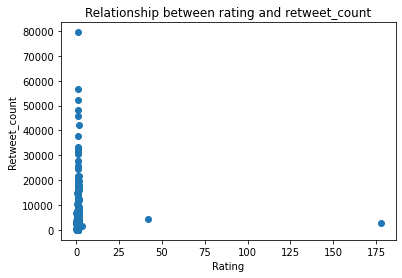

In [77]:
plt.scatter(data=df_clean, x='rating',y='retweet_count')
plt.xlabel('Rating')
plt.ylabel('Retweet_count')
plt.title('Relationship between rating and retweet_count');

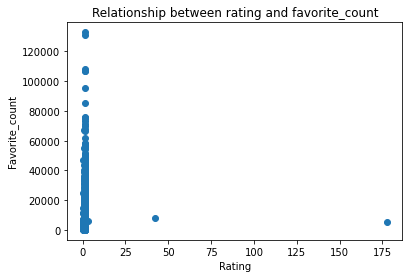

In [78]:
plt.scatter(data=df_clean, x='rating',y='favorite_count')
plt.xlabel('Rating')
plt.ylabel('Favorite_count')
plt.title('Relationship between rating and favorite_count');

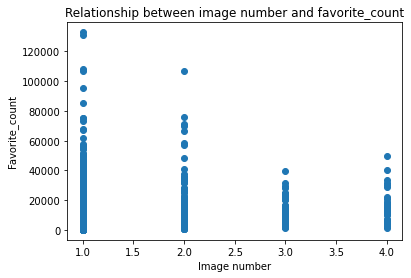

In [79]:
plt.scatter(data=df_clean, x='img_num',y='favorite_count')
plt.xlabel('Image number')
plt.ylabel('Favorite_count')
plt.title('Relationship between image number and favorite_count');

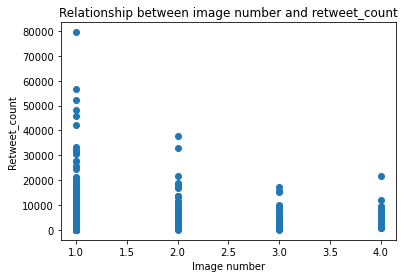

In [80]:
plt.scatter(data=df_clean, x='img_num',y='retweet_count')
plt.xlabel('Image number')
plt.ylabel('Retweet_count')
plt.title('Relationship between image number and retweet_count');

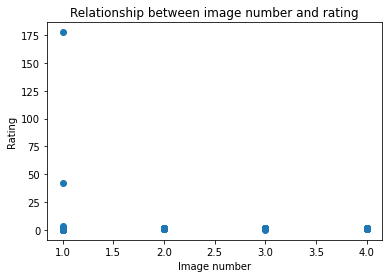

In [81]:
plt.scatter(data=df_clean, x='img_num',y='rating')
plt.xlabel('Image number')
plt.ylabel('Rating')
plt.title('Relationship between image number and rating');

### Insights:
1. Max favorite_count is 131075

2. Max retweet_count is 79515

3. From the scatter plot "Relationship between rating and retweet_count", we could know that there is no correlation between rating and retweet_count.

4. From the scatter plot "Relationship between rating and favorite_count", we could know that there is no correlation between rating and favorite_count.

5. From the scatter plot "Relationship between image number and favorite_count", we could know that there is no correlation between image number and favorite_count.

6. From the scatter plot "Relationship between image number and retweet_count", we could know that there is no correlation between image number and retweet-count.